In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt
from IPython.display import clear_output
import cv2 
import numpy as np

Using TensorFlow backend.


In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [4]:
def plot(idx):
    plt.imshow(x_train[idx])
    print("label: ", y_train[idx])
    plt.show()

label:  2


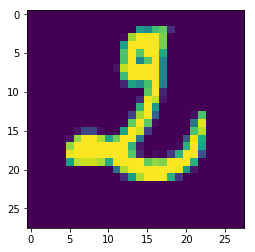

In [8]:
plot(190)

In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [10]:
x_train.shape

(60000, 784)

In [12]:
# img.shape

In [13]:
x_test.shape

(10000, 784)

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [4]:
# convert class vectors to binary class matrices
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(rate = 0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________

In [6]:
def model_compile(model):
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [7]:
def train_model(batch_size,epochs):
    num_classes = 10
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
#                     callbacks=[plot_losses])
    return history

In [8]:
def plot_loss(model):
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [9]:
def plot_accuracy(model):
    acc = model.history['acc']
    val_acc = model.history['val_acc']
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('model Acc')
    plt.ylabel('Acc')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [10]:
def model_evaluate():
    score = model.evaluate(x_test, y_test, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

In [27]:
model_compile(model)

In [28]:
model1 = train_model(128,10)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2433 - acc: 0.9251 - val_loss: 0.1044 - val_acc: 0.9666
Epoch 2/10
 - 6s - loss: 0.1033 - acc: 0.9684 - val_loss: 0.0852 - val_acc: 0.9749
Epoch 3/10
 - 6s - loss: 0.0758 - acc: 0.9773 - val_loss: 0.0805 - val_acc: 0.9778
Epoch 4/10
 - 6s - loss: 0.0613 - acc: 0.9817 - val_loss: 0.0761 - val_acc: 0.9798
Epoch 5/10
 - 7s - loss: 0.0503 - acc: 0.9844 - val_loss: 0.0724 - val_acc: 0.9814
Epoch 6/10
 - 7s - loss: 0.0440 - acc: 0.9869 - val_loss: 0.0750 - val_acc: 0.9817
Epoch 7/10
 - 7s - loss: 0.0397 - acc: 0.9885 - val_loss: 0.0826 - val_acc: 0.9808
Epoch 8/10
 - 7s - loss: 0.0338 - acc: 0.9898 - val_loss: 0.0774 - val_acc: 0.9826
Epoch 9/10
 - 7s - loss: 0.0333 - acc: 0.9907 - val_loss: 0.0816 - val_acc: 0.9833
Epoch 10/10
 - 7s - loss: 0.0303 - acc: 0.9912 - val_loss: 0.1026 - val_acc: 0.9806


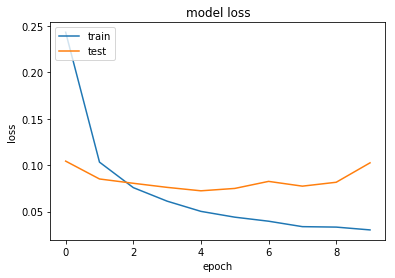

In [29]:
plot_loss(model1)

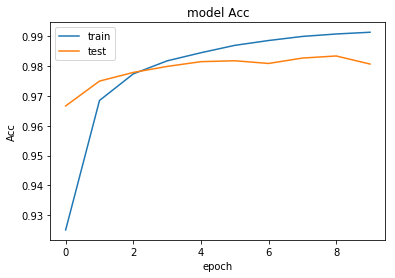

In [32]:
plot_accuracy(model1)

In [38]:
model_evaluate()

10000/10000 [==============================] - 0s 36us/step
Test loss: 0.10255780398660257
Test accuracy: 0.9806


In [39]:
model2 = train_model(128,20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 5s - loss: 0.0260 - acc: 0.9925 - val_loss: 0.0907 - val_acc: 0.9817
Epoch 2/20
 - 5s - loss: 0.0242 - acc: 0.9928 - val_loss: 0.0975 - val_acc: 0.9824
Epoch 3/20
 - 6s - loss: 0.0245 - acc: 0.9934 - val_loss: 0.0913 - val_acc: 0.9830
Epoch 4/20
 - 6s - loss: 0.0240 - acc: 0.9935 - val_loss: 0.0999 - val_acc: 0.9819
Epoch 5/20
 - 7s - loss: 0.0244 - acc: 0.9934 - val_loss: 0.1017 - val_acc: 0.9823
Epoch 6/20
 - 7s - loss: 0.0209 - acc: 0.9943 - val_loss: 0.1039 - val_acc: 0.9823
Epoch 7/20
 - 7s - loss: 0.0216 - acc: 0.9940 - val_loss: 0.1025 - val_acc: 0.9829
Epoch 8/20
 - 7s - loss: 0.0186 - acc: 0.9948 - val_loss: 0.1199 - val_acc: 0.9819
Epoch 9/20
 - 7s - loss: 0.0176 - acc: 0.9950 - val_loss: 0.1172 - val_acc: 0.9833
Epoch 10/20
 - 7s - loss: 0.0182 - acc: 0.9955 - val_loss: 0.1135 - val_acc: 0.9819
Epoch 11/20
 - 7s - loss: 0.0174 - acc: 0.9959 - val_loss: 0.1187 - val_acc: 0.9838
Epoch 12/20
 - 7s - loss: 0.0182 - 

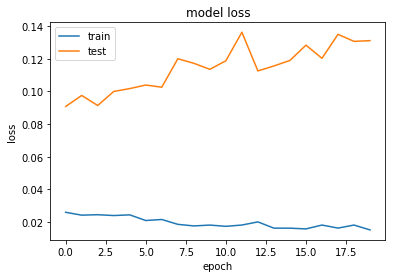

In [40]:
plot_loss(model2)

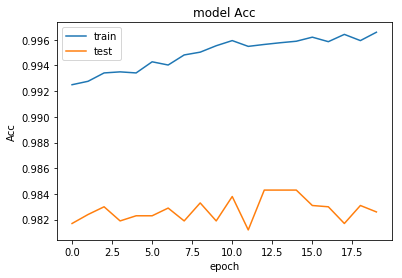

In [41]:
plot_accuracy(model2)

In [42]:
model3 = train_model(128,50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 6s - loss: 0.0155 - acc: 0.9965 - val_loss: 0.1325 - val_acc: 0.9845
Epoch 2/50
 - 6s - loss: 0.0152 - acc: 0.9964 - val_loss: 0.1342 - val_acc: 0.9841
Epoch 3/50
 - 6s - loss: 0.0142 - acc: 0.9970 - val_loss: 0.1249 - val_acc: 0.9839
Epoch 4/50
 - 6s - loss: 0.0134 - acc: 0.9970 - val_loss: 0.1381 - val_acc: 0.9832
Epoch 5/50
 - 7s - loss: 0.0131 - acc: 0.9968 - val_loss: 0.1213 - val_acc: 0.9842
Epoch 6/50
 - 7s - loss: 0.0146 - acc: 0.9970 - val_loss: 0.1346 - val_acc: 0.9845
Epoch 7/50
 - 7s - loss: 0.0134 - acc: 0.9971 - val_loss: 0.1313 - val_acc: 0.9856
Epoch 8/50
 - 7s - loss: 0.0142 - acc: 0.9969 - val_loss: 0.1288 - val_acc: 0.9848
Epoch 9/50
 - 7s - loss: 0.0131 - acc: 0.9972 - val_loss: 0.1337 - val_acc: 0.9839
Epoch 10/50
 - 7s - loss: 0.0147 - acc: 0.9968 - val_loss: 0.1339 - val_acc: 0.9836
Epoch 11/50
 - 7s - loss: 0.0108 - acc: 0.9975 - val_loss: 0.1276 - val_acc: 0.9847
Epoch 12/50
 - 7s - loss: 0.0137 - 

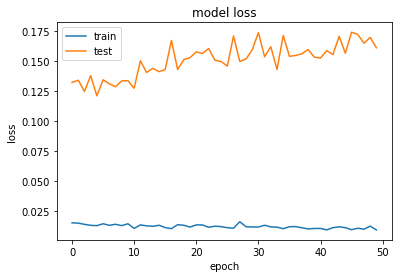

In [43]:
plot_loss(model3)

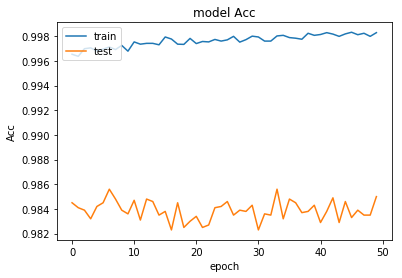

In [44]:
plot_accuracy(model3)

In [45]:
model4 = train_model(128,70)

Train on 60000 samples, validate on 10000 samples
Epoch 1/70
 - 5s - loss: 0.0082 - acc: 0.9984 - val_loss: 0.1681 - val_acc: 0.9833
Epoch 2/70
 - 5s - loss: 0.0101 - acc: 0.9984 - val_loss: 0.1553 - val_acc: 0.9847
Epoch 3/70
 - 6s - loss: 0.0085 - acc: 0.9985 - val_loss: 0.1643 - val_acc: 0.9837
Epoch 4/70
 - 7s - loss: 0.0112 - acc: 0.9982 - val_loss: 0.1741 - val_acc: 0.9837
Epoch 5/70
 - 8s - loss: 0.0131 - acc: 0.9978 - val_loss: 0.1674 - val_acc: 0.9845
Epoch 6/70
 - 7s - loss: 0.0121 - acc: 0.9980 - val_loss: 0.1658 - val_acc: 0.9837
Epoch 7/70
 - 7s - loss: 0.0099 - acc: 0.9983 - val_loss: 0.1786 - val_acc: 0.9841
Epoch 8/70
 - 7s - loss: 0.0093 - acc: 0.9983 - val_loss: 0.1906 - val_acc: 0.9819
Epoch 9/70
 - 7s - loss: 0.0138 - acc: 0.9979 - val_loss: 0.1877 - val_acc: 0.9818
Epoch 10/70
 - 7s - loss: 0.0124 - acc: 0.9979 - val_loss: 0.1683 - val_acc: 0.9851
Epoch 11/70
 - 7s - loss: 0.0087 - acc: 0.9985 - val_loss: 0.1787 - val_acc: 0.9837
Epoch 12/70
 - 7s - loss: 0.0110 - 

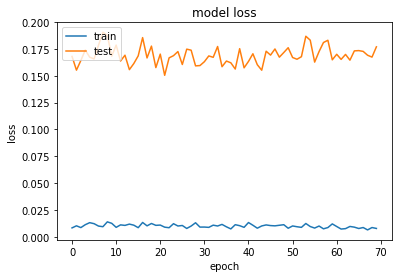

In [47]:
plot_loss(model4)

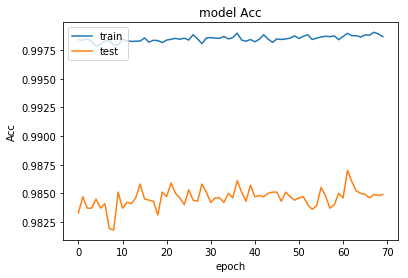

In [48]:
plot_accuracy(model4)

In [49]:
model5 = train_model(128,150)

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
 - 5s - loss: 0.0082 - acc: 0.9988 - val_loss: 0.1638 - val_acc: 0.9856
Epoch 2/150
 - 5s - loss: 0.0085 - acc: 0.9988 - val_loss: 0.1658 - val_acc: 0.9851
Epoch 3/150
 - 6s - loss: 0.0094 - acc: 0.9989 - val_loss: 0.1708 - val_acc: 0.9859
Epoch 4/150
 - 6s - loss: 0.0078 - acc: 0.9989 - val_loss: 0.1700 - val_acc: 0.9857
Epoch 5/150
 - 7s - loss: 0.0078 - acc: 0.9991 - val_loss: 0.1578 - val_acc: 0.9869
Epoch 6/150
 - 7s - loss: 0.0071 - acc: 0.9989 - val_loss: 0.1679 - val_acc: 0.9860
Epoch 7/150
 - 7s - loss: 0.0079 - acc: 0.9989 - val_loss: 0.1785 - val_acc: 0.9850
Epoch 8/150
 - 7s - loss: 0.0081 - acc: 0.9989 - val_loss: 0.1607 - val_acc: 0.9854
Epoch 9/150
 - 7s - loss: 0.0068 - acc: 0.9992 - val_loss: 0.1567 - val_acc: 0.9859
Epoch 10/150
 - 7s - loss: 0.0077 - acc: 0.9989 - val_loss: 0.1637 - val_acc: 0.9866
Epoch 11/150
 - 7s - loss: 0.0089 - acc: 0.9988 - val_loss: 0.1828 - val_acc: 0.9838
Epoch 12/150
 - 7s - los

Epoch 97/150
 - 7s - loss: 0.0070 - acc: 0.9992 - val_loss: 0.1941 - val_acc: 0.9844
Epoch 98/150
 - 7s - loss: 0.0074 - acc: 0.9990 - val_loss: 0.1876 - val_acc: 0.9847
Epoch 99/150
 - 7s - loss: 0.0062 - acc: 0.9992 - val_loss: 0.1829 - val_acc: 0.9854
Epoch 100/150
 - 7s - loss: 0.0050 - acc: 0.9994 - val_loss: 0.1885 - val_acc: 0.9853
Epoch 101/150
 - 7s - loss: 0.0064 - acc: 0.9992 - val_loss: 0.1736 - val_acc: 0.9866
Epoch 102/150
 - 7s - loss: 0.0079 - acc: 0.9990 - val_loss: 0.1723 - val_acc: 0.9855
Epoch 103/150
 - 7s - loss: 0.0070 - acc: 0.9992 - val_loss: 0.1655 - val_acc: 0.9868
Epoch 104/150
 - 7s - loss: 0.0064 - acc: 0.9993 - val_loss: 0.1728 - val_acc: 0.9861
Epoch 105/150
 - 7s - loss: 0.0088 - acc: 0.9990 - val_loss: 0.1729 - val_acc: 0.9857
Epoch 106/150
 - 7s - loss: 0.0067 - acc: 0.9990 - val_loss: 0.1695 - val_acc: 0.9853
Epoch 107/150
 - 7s - loss: 0.0079 - acc: 0.9992 - val_loss: 0.1708 - val_acc: 0.9855
Epoch 108/150
 - 7s - loss: 0.0053 - acc: 0.9993 - val_lo

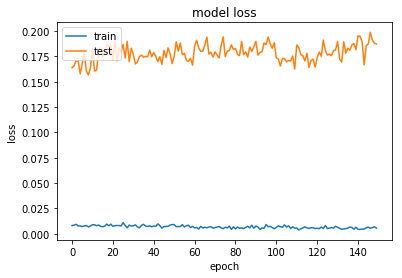

In [50]:
plot_loss(model5)

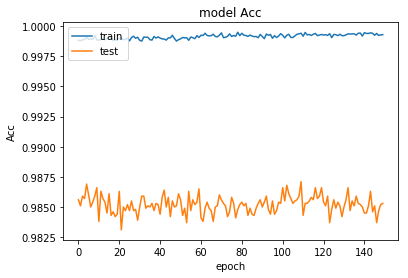

In [51]:
plot_accuracy(model5)

### Changing Batch size

In [52]:
model1_batch1 = train_model(32,20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 15s - loss: 0.0063 - acc: 0.9992 - val_loss: 0.2011 - val_acc: 0.9836
Epoch 2/20
 - 17s - loss: 0.0057 - acc: 0.9993 - val_loss: 0.1861 - val_acc: 0.9856
Epoch 3/20
 - 18s - loss: 0.0081 - acc: 0.9990 - val_loss: 0.2100 - val_acc: 0.9839
Epoch 4/20
 - 17s - loss: 0.0075 - acc: 0.9991 - val_loss: 0.1908 - val_acc: 0.9846
Epoch 5/20
 - 17s - loss: 0.0071 - acc: 0.9992 - val_loss: 0.1833 - val_acc: 0.9856
Epoch 6/20
 - 17s - loss: 0.0060 - acc: 0.9993 - val_loss: 0.1784 - val_acc: 0.9861
Epoch 7/20
 - 17s - loss: 0.0066 - acc: 0.9992 - val_loss: 0.2082 - val_acc: 0.9838
Epoch 8/20
 - 18s - loss: 0.0045 - acc: 0.9995 - val_loss: 0.2020 - val_acc: 0.9842
Epoch 9/20
 - 17s - loss: 0.0072 - acc: 0.9992 - val_loss: 0.1877 - val_acc: 0.9853
Epoch 10/20
 - 18s - loss: 0.0089 - acc: 0.9991 - val_loss: 0.1873 - val_acc: 0.9851
Epoch 11/20
 - 18s - loss: 0.0062 - acc: 0.9992 - val_loss: 0.1975 - val_acc: 0.9845
Epoch 12/20
 - 17s - los

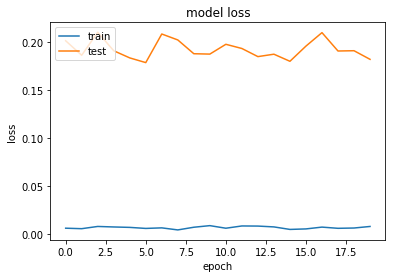

In [53]:
plot_loss(model1_batch1)

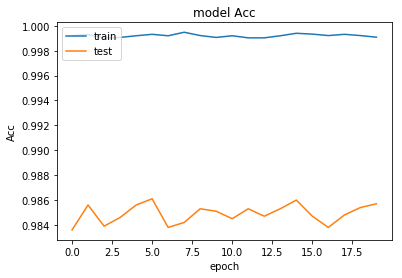

In [54]:
plot_accuracy(model1_batch1)

In [55]:
model1_batch2 = train_model(64,20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 9s - loss: 0.0061 - acc: 0.9993 - val_loss: 0.1820 - val_acc: 0.9862
Epoch 2/20
 - 10s - loss: 0.0066 - acc: 0.9993 - val_loss: 0.1976 - val_acc: 0.9841
Epoch 3/20
 - 13s - loss: 0.0072 - acc: 0.9992 - val_loss: 0.1851 - val_acc: 0.9853
Epoch 4/20
 - 12s - loss: 0.0064 - acc: 0.9993 - val_loss: 0.1788 - val_acc: 0.9864
Epoch 5/20
 - 12s - loss: 0.0053 - acc: 0.9994 - val_loss: 0.1943 - val_acc: 0.9848
Epoch 6/20
 - 12s - loss: 0.0051 - acc: 0.9994 - val_loss: 0.1747 - val_acc: 0.9863
Epoch 7/20
 - 12s - loss: 0.0061 - acc: 0.9993 - val_loss: 0.1749 - val_acc: 0.9863
Epoch 8/20
 - 12s - loss: 0.0069 - acc: 0.9992 - val_loss: 0.1802 - val_acc: 0.9854
Epoch 9/20
 - 12s - loss: 0.0065 - acc: 0.9993 - val_loss: 0.1649 - val_acc: 0.9866
Epoch 10/20
 - 12s - loss: 0.0037 - acc: 0.9996 - val_loss: 0.1774 - val_acc: 0.9859
Epoch 11/20
 - 11s - loss: 0.0048 - acc: 0.9994 - val_loss: 0.1829 - val_acc: 0.9847
Epoch 12/20
 - 12s - loss

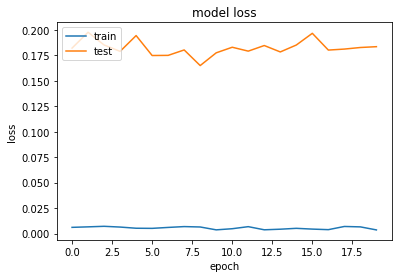

In [56]:
plot_loss(model1_batch2)

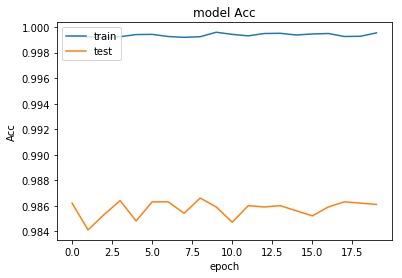

In [57]:
plot_accuracy(model1_batch2)

In [58]:
model1_batch3 = train_model(256,20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 0.0038 - acc: 0.9995 - val_loss: 0.1701 - val_acc: 0.9869
Epoch 2/20
 - 4s - loss: 0.0052 - acc: 0.9994 - val_loss: 0.1809 - val_acc: 0.9857
Epoch 3/20
 - 4s - loss: 0.0057 - acc: 0.9993 - val_loss: 0.1740 - val_acc: 0.9863
Epoch 4/20
 - 5s - loss: 0.0080 - acc: 0.9991 - val_loss: 0.1776 - val_acc: 0.9867
Epoch 5/20
 - 5s - loss: 0.0053 - acc: 0.9994 - val_loss: 0.1831 - val_acc: 0.9862
Epoch 6/20
 - 5s - loss: 0.0032 - acc: 0.9996 - val_loss: 0.1861 - val_acc: 0.9859
Epoch 7/20
 - 5s - loss: 0.0045 - acc: 0.9995 - val_loss: 0.1844 - val_acc: 0.9857
Epoch 8/20
 - 5s - loss: 0.0034 - acc: 0.9996 - val_loss: 0.1754 - val_acc: 0.9861
Epoch 9/20
 - 5s - loss: 0.0037 - acc: 0.9996 - val_loss: 0.1823 - val_acc: 0.9855
Epoch 10/20
 - 5s - loss: 0.0032 - acc: 0.9996 - val_loss: 0.1896 - val_acc: 0.9856
Epoch 11/20
 - 5s - loss: 0.0041 - acc: 0.9995 - val_loss: 0.1974 - val_acc: 0.9851
Epoch 12/20
 - 5s - loss: 0.0031 - 

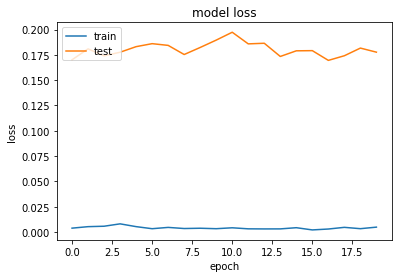

In [59]:
plot_loss(model1_batch3)

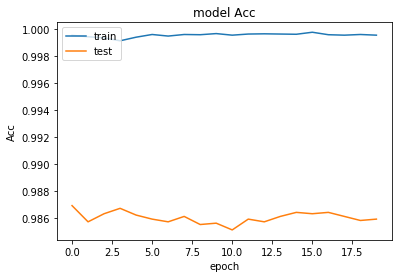

In [60]:
plot_accuracy(model1_batch3)

### Change in Network configuration

In [65]:
def network1(model,batch_size,epochs):
    num_classes = 10
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
    return history

In [74]:
def network2(model,batch_size,epochs):

    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
      
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
    return history

In [81]:
def network3(model,batch_size,epochs):
    
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
      
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
    return history

In [66]:
n1 = Sequential()
n1_model1 = network1(n1,128,10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2561 - acc: 0.9218 - val_loss: 0.1073 - val_acc: 0.9668
Epo

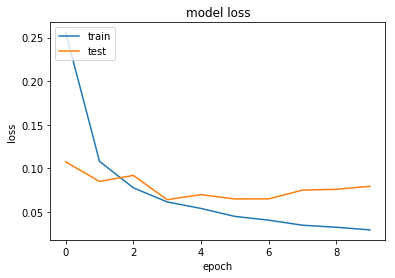

In [67]:
plot_loss(n1_model1)

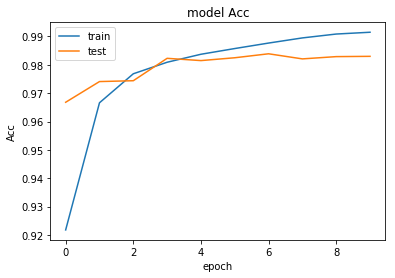

In [68]:
plot_accuracy(n1_model1)

In [86]:
n1_m2 = Sequential()
n1_model2 = network1(n1_m2,128,20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 0.2586 - acc: 0.9206 - val_loss: 0.1060 - val_acc: 0.9667
Epo

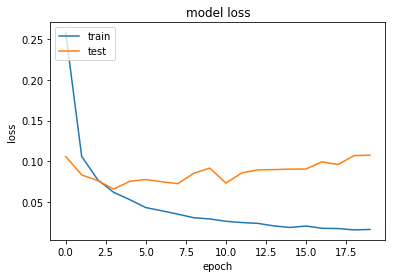

In [87]:
plot_loss(n1_model2)

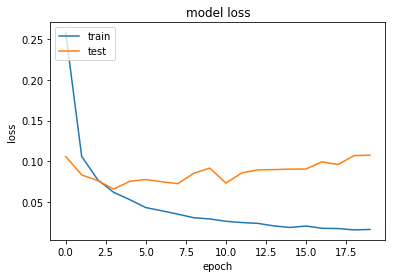

In [88]:
plot_loss(n1_model2)

In [75]:
n2 = Sequential()
n2_model1 = network2(n2,128,10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total para

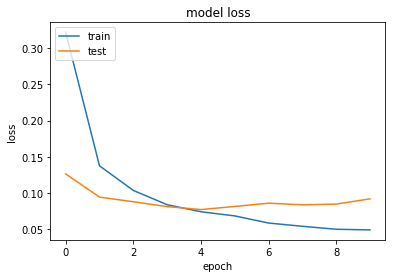

In [78]:
plot_loss(n2_model1)

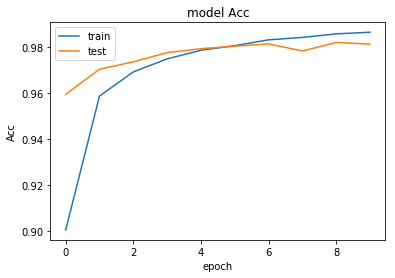

In [79]:
plot_accuracy(n2_model1)

In [93]:
n2_m2 = Sequential()
n2_model2 = network2(n2_m2,128,20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1290      
Total para

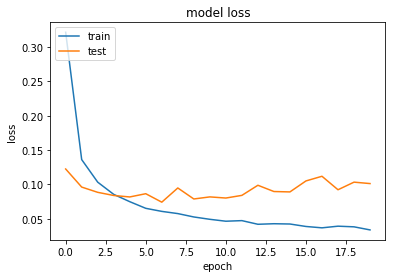

In [94]:
plot_loss(n2_model2)

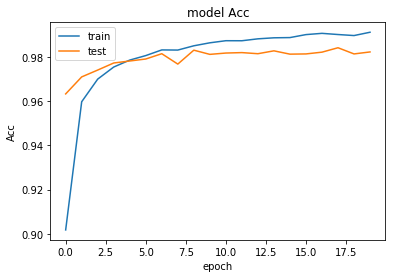

In [95]:
plot_accuracy(n2_model2)

In [82]:
n3 = Sequential()
n3_model1 = network3(n3,128,10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
__________

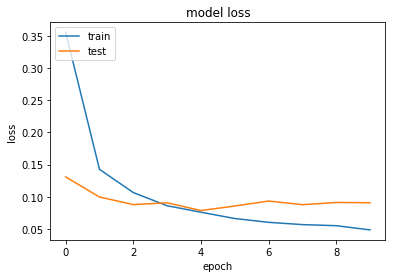

In [84]:
plot_loss(n3_model1)

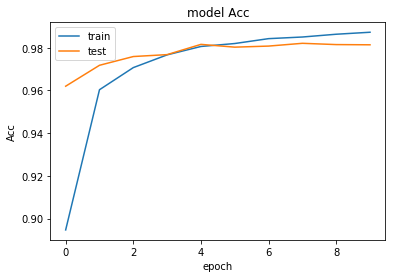

In [83]:
plot_accuracy(n3_model1)

In [96]:
n3_m1 = Sequential()
n3_model2 = network3(n3_m1,128,20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_32 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)                8256      
__________

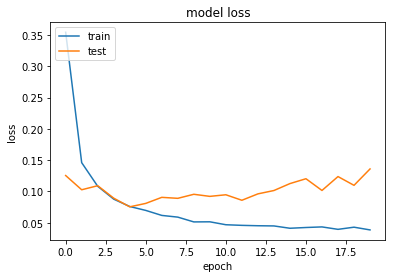

In [97]:
plot_loss(n3_model2)

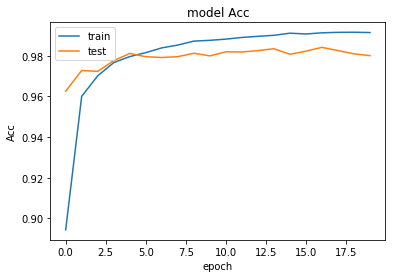

In [98]:
plot_accuracy(n3_model2)

### Changes in Loss and Accuracy by changing various parameters of the network:

In [101]:
def network_effect1(model,batch_size,epochs):
    num_classes = 10
    model.add(Dense(512, activation='tanh', input_shape=(784,)))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(512, activation='tanh'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    
    model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
    return history

In [102]:
net_eff1 = Sequential()
net_eff_m1 = network_effect1(net_eff1,128,20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_36 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_37 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 7s - loss: 0.3160 - acc: 0.9050 - val_loss: 0.1605 - val_acc: 0.9538
Epo

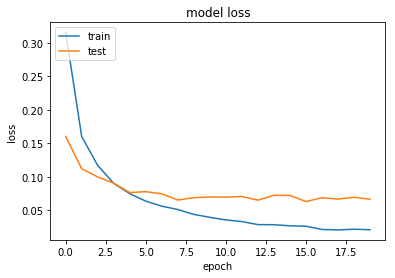

In [103]:
plot_loss(net_eff_m1)

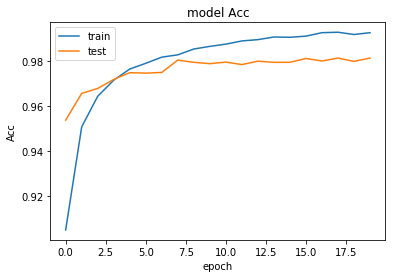

In [104]:
plot_accuracy(net_eff_m1)

In [27]:
def network_effect1_1(model,batch_size,epochs):
    num_classes = 10
    model.add(Dense(512, activation='tanh', input_shape=(784,)))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(512, activation='tanh'))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    
    model.compile(loss='categorical_crossentropy',
              optimizer=adamm,
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
    return history

In [28]:
net_eff1_1 = Sequential()
net_eff_m1_1 = network_effect1_1(net_eff1_1,128,20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 7s - loss: 0.3701 - acc: 0.8888 - val_loss: 0.2060 - val_acc: 0.9391
Epo

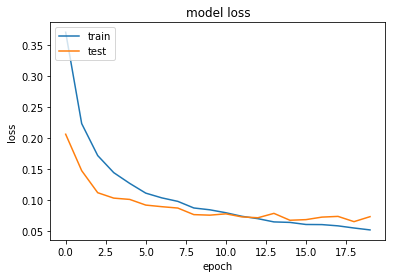

In [29]:
plot_loss(net_eff_m1_1)

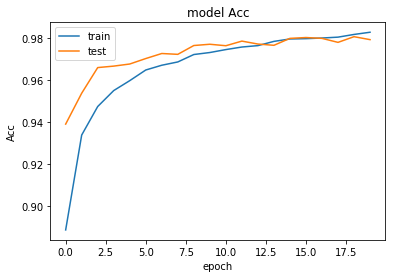

In [30]:
plot_accuracy(net_eff_m1_1)

In [25]:
def network_effect1_3(model,batch_size,epochs):
    num_classes = 10
    model.add(Dense(512, activation='tanh', input_shape=(784,)))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(512, activation='tanh'))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    
    adam = keras.optimizers.Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    
    model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
    return history

In [26]:
net_eff1_3 = Sequential()
net_eff_m1_3 = network_effect1_3(net_eff1_3,128,70)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/70
 - 8s - loss: 0.3415 - acc: 0.8960 - val_loss: 0.1765 - val_acc: 0.9452
Epo

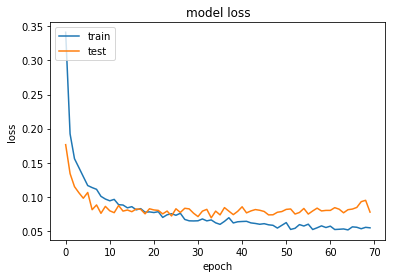

In [27]:
plot_loss(net_eff_m1_3)

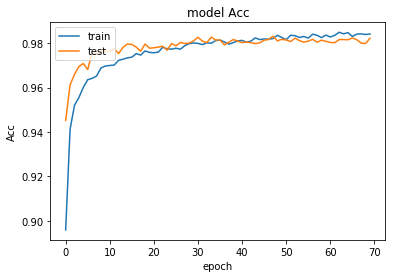

In [28]:
plot_accuracy(net_eff_m1_3)

In [12]:
def network_effect1_4(model,batch_size,epochs):
    num_classes = 10
    model.add(Dense(512, activation='tanh', input_shape=(784,)))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(512, activation='tanh'))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    
    adam = keras.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    
    model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
    return history

In [13]:
net_eff1_4 = Sequential()
net_eff_m1_4 = network_effect1_4(net_eff1_4,128,70)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/70
 - 7s - loss: 0.3364 - acc:

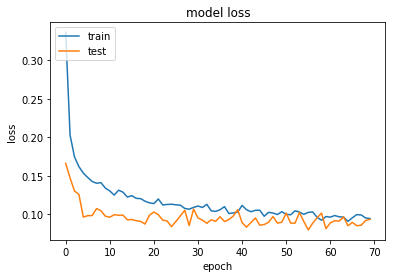

In [14]:
plot_loss(net_eff_m1_4)

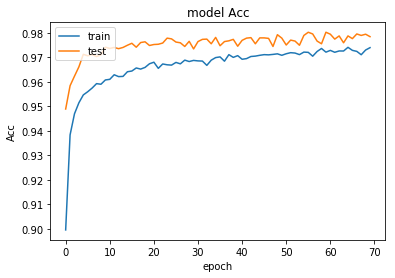

In [15]:
plot_accuracy(net_eff_m1_4)

In [16]:
def network_effect1_5(model,batch_size,epochs):
    num_classes = 10
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    
    adam = keras.optimizers.Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    
    model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
    return history

In [18]:
net_eff1_5 = Sequential()
net_eff_m1_5 = network_effect1_5(net_eff1_5,128,70)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total para

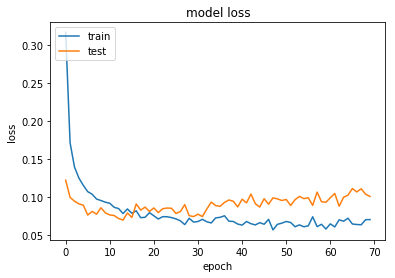

In [19]:
plot_loss(net_eff_m1_5)

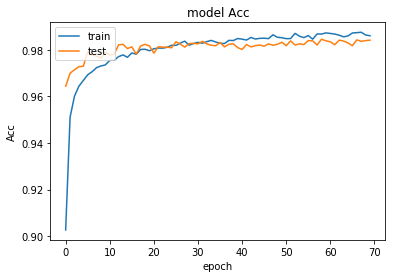

In [20]:
plot_accuracy(net_eff_m1_5)

In [34]:
def network_effect2(model,batch_size,epochs):
    num_classes = 10
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    
    model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
    return history

In [22]:
net_eff2 = Sequential()
net_eff_m2 = network_effect2(net_eff2,128,50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 7s - loss: 0.2505 - acc: 0.9258 - val_loss: 0.1018 - val_acc: 0.9690
Epo

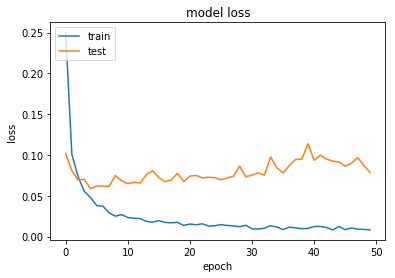

In [26]:
plot_loss(net_eff_m2)

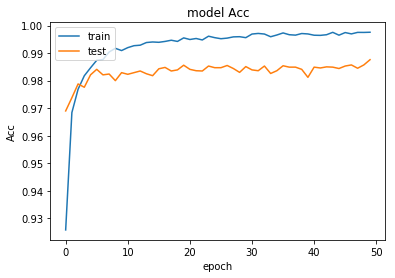

In [27]:
plot_accuracy(net_eff_m2)

In [28]:
def network_effect2_1_1(model,batch_size,epochs):
    num_classes = 10
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(rate = 0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(rate = 0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    
    adam = keras.optimizers.Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    
    model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
    return history

In [29]:
net_eff2_1_1 = Sequential()
net_eff2_1_1 = network_effect2_1_1(net_eff2_1_1,128,70)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/70
 - 7s - loss: 0.3157 - acc: 0.9029 - val_loss: 0.1198 - val_acc: 0.9632
Epo

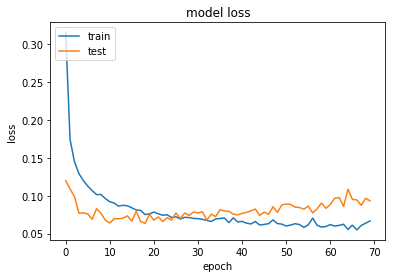

In [30]:
plot_loss(net_eff2_1_1)

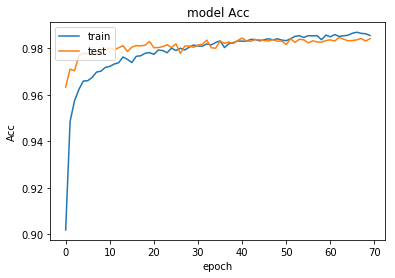

In [41]:
plot_accuracy(net_eff2_1_1)

In [36]:
def network_effect2_1_2(model,batch_size,epochs):
    num_classes = 10
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(rate = 0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    
    adam = keras.optimizers.Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    
    model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
    return history

In [37]:
net_eff2_1_2 = Sequential()
net_eff2_1_2 = network_effect2_1_2(net_eff2_1_2,128,70)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/70
 - 7s - loss: 0.2843 - acc: 0.9113 - val_loss: 0.1132 - val_acc: 0.9640
Epo

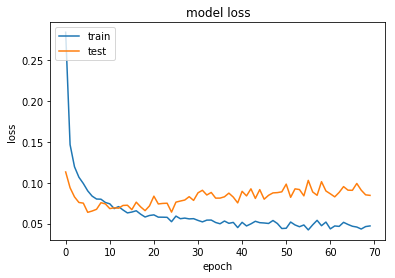

In [38]:
plot_loss(net_eff2_1_2)

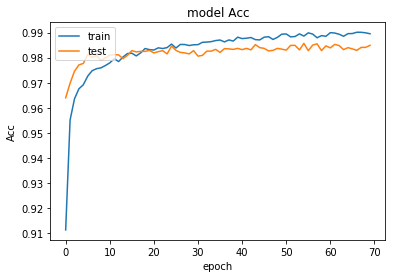

In [39]:
plot_accuracy(net_eff2_1_2)

In [110]:
# def network_effect3(model,batch_size,epochs):
#     num_classes = 10
#     model.add(Dense(512, activation='tanh', input_shape=(784,)))
#     model.add(Dropout(rate = 0.2))
#     model.add(Dense(256, activation='tanh'))
#     model.add(Dropout(rate = 0.2))
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(rate = 0.2))
#     model.add(Dense(num_classes, activation='softmax'))

#     model.summary()
    
#     adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    
#     model.compile(loss='categorical_crossentropy',
#               optimizer=adam,
#               metrics=['accuracy'])
    
#     history = model.fit(x_train, y_train,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=2,
#                     validation_data=(x_test, y_test))
#     return history

In [111]:
net_eff3 = Sequential()
net_eff_m3 = network_effect3(net_eff3,128,30)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_42 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_43 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_44 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 10)                1290      
Total para

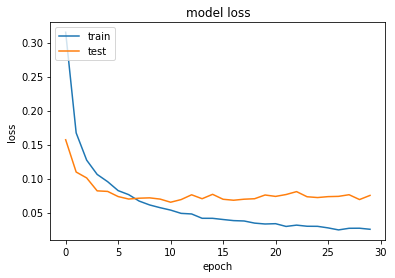

In [112]:
plot_loss(net_eff_m3)

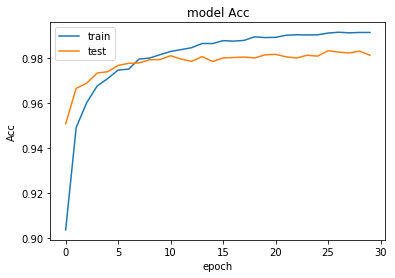

In [113]:
plot_accuracy(net_eff_m3)

In [37]:
def network_effect3_1(model,batch_size,epochs):
    num_classes = 10
    model.add(Dense(512, activation='tanh', input_shape=(784,)))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(256, activation='tanh'))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    
    model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
    return history

In [38]:
net_eff3_1 = Sequential()
net_eff_m3_1 = network_effect3_1(net_eff3_1,128,30)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1290      
Total para

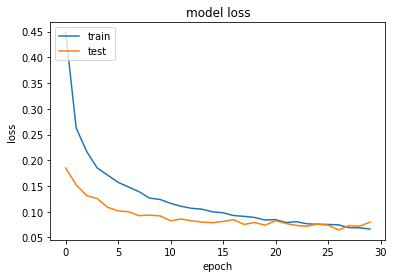

In [39]:
plot_loss(net_eff_m3_1)

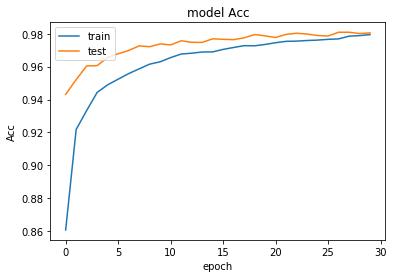

In [40]:
plot_accuracy(net_eff_m3_1)

In [114]:
def network_effect4(model,batch_size,epochs):
    num_classes = 10
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    
    model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
    return history

In [118]:
net_eff4 = Sequential()
net_eff_m4 = network_effect4(net_eff4,128,50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_48 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_49 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_50 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 10)                1290      
Total para

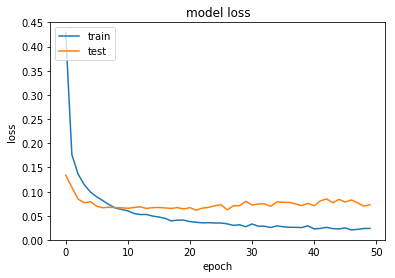

In [119]:
plot_loss(net_eff_m4)

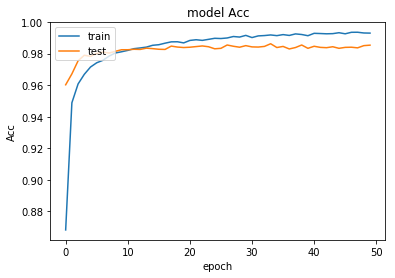

In [120]:
plot_accuracy(net_eff_m4)

In [41]:
def network_effect4_1(model,batch_size,epochs):
    num_classes = 10
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    
    model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
    return history

In [42]:
net_eff4_1 = Sequential()
net_eff_m4_1 = network_effect4_1(net_eff4_1,128,50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1290      
Total para

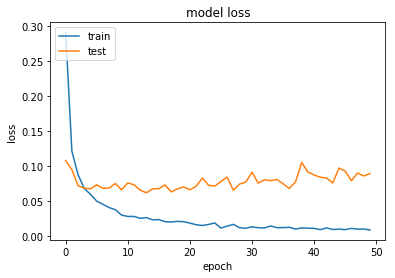

In [43]:
plot_loss(net_eff_m4_1)

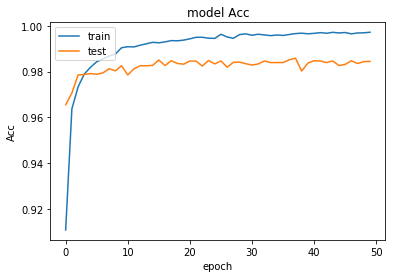

In [44]:
plot_accuracy(net_eff_m4_1)

In [45]:
net_eff4_2 = Sequential()
net_eff_m4_2 = network_effect4_1(net_eff4_2,128,100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1290      
Total para

 - 6s - loss: 0.0104 - acc: 0.9973 - val_loss: 0.0910 - val_acc: 0.9855
Epoch 83/100
 - 6s - loss: 0.0070 - acc: 0.9978 - val_loss: 0.0899 - val_acc: 0.9861
Epoch 84/100
 - 6s - loss: 0.0053 - acc: 0.9987 - val_loss: 0.0859 - val_acc: 0.9859
Epoch 85/100
 - 6s - loss: 0.0064 - acc: 0.9983 - val_loss: 0.0893 - val_acc: 0.9861
Epoch 86/100
 - 6s - loss: 0.0059 - acc: 0.9982 - val_loss: 0.0978 - val_acc: 0.9855
Epoch 87/100
 - 7s - loss: 0.0058 - acc: 0.9984 - val_loss: 0.0949 - val_acc: 0.9866
Epoch 88/100
 - 7s - loss: 0.0077 - acc: 0.9980 - val_loss: 0.0954 - val_acc: 0.9864
Epoch 89/100
 - 6s - loss: 0.0096 - acc: 0.9977 - val_loss: 0.0938 - val_acc: 0.9858
Epoch 90/100
 - 6s - loss: 0.0078 - acc: 0.9980 - val_loss: 0.0944 - val_acc: 0.9868
Epoch 91/100
 - 6s - loss: 0.0067 - acc: 0.9983 - val_loss: 0.0916 - val_acc: 0.9855
Epoch 92/100
 - 6s - loss: 0.0069 - acc: 0.9980 - val_loss: 0.1056 - val_acc: 0.9855
Epoch 93/100
 - 6s - loss: 0.0065 - acc: 0.9981 - val_loss: 0.1035 - val_acc: 

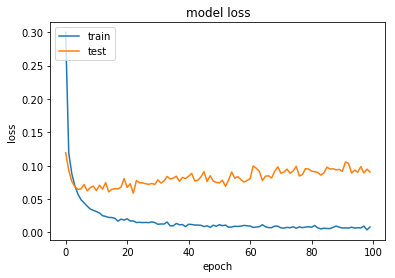

In [46]:
plot_loss(net_eff_m4_2)

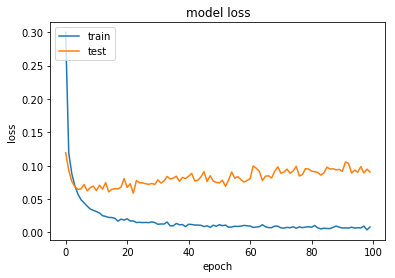

In [47]:
plot_loss(net_eff_m4_2)

In [48]:
def network_effect5(model,batch_size,epochs):
    num_classes = 10
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    
    model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
    return history

In [49]:
net_eff5 = Sequential()
net_eff_m5 = network_effect5(net_eff5,128,50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                8256      
__________

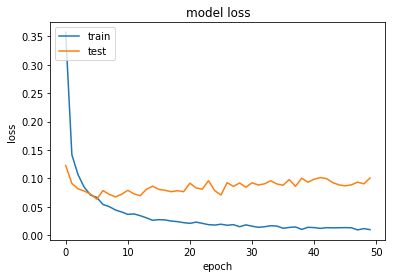

In [50]:
plot_loss(net_eff_m5)

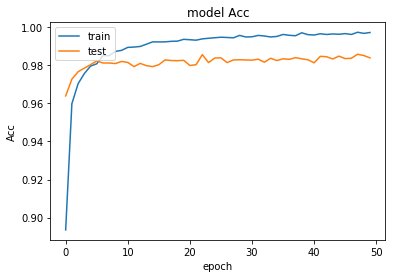

In [51]:
plot_accuracy(net_eff_m5)

In [52]:
net_eff6 = Sequential()
net_eff_m6 = network_effect5(net_eff6,128,100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_32 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)                8256      
__________

Epoch 79/100
 - 7s - loss: 0.0091 - acc: 0.9978 - val_loss: 0.1111 - val_acc: 0.9829
Epoch 80/100
 - 7s - loss: 0.0095 - acc: 0.9976 - val_loss: 0.1060 - val_acc: 0.9845
Epoch 81/100
 - 7s - loss: 0.0086 - acc: 0.9977 - val_loss: 0.1007 - val_acc: 0.9852
Epoch 82/100
 - 7s - loss: 0.0102 - acc: 0.9974 - val_loss: 0.0835 - val_acc: 0.9855
Epoch 83/100
 - 7s - loss: 0.0088 - acc: 0.9979 - val_loss: 0.0859 - val_acc: 0.9856
Epoch 84/100
 - 7s - loss: 0.0076 - acc: 0.9979 - val_loss: 0.0995 - val_acc: 0.9842
Epoch 85/100
 - 6s - loss: 0.0080 - acc: 0.9978 - val_loss: 0.1017 - val_acc: 0.9839
Epoch 86/100
 - 6s - loss: 0.0078 - acc: 0.9980 - val_loss: 0.1011 - val_acc: 0.9860
Epoch 87/100
 - 6s - loss: 0.0070 - acc: 0.9981 - val_loss: 0.1055 - val_acc: 0.9856
Epoch 88/100
 - 7s - loss: 0.0089 - acc: 0.9981 - val_loss: 0.0982 - val_acc: 0.9847
Epoch 89/100
 - 6s - loss: 0.0082 - acc: 0.9978 - val_loss: 0.0973 - val_acc: 0.9849
Epoch 90/100
 - 6s - loss: 0.0089 - acc: 0.9978 - val_loss: 0.109

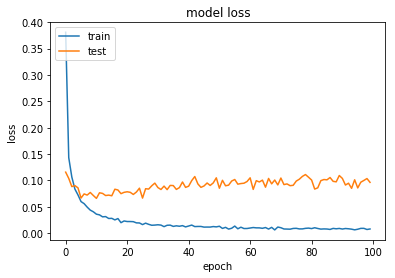

In [53]:
plot_loss(net_eff_m6)

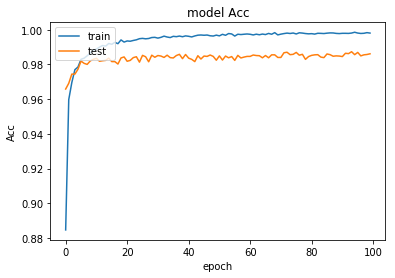

In [54]:
plot_accuracy(net_eff_m6)

In [55]:
def network_effect5_1(model,batch_size,epochs):
    num_classes = 10
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(rate = 0.4))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    
    model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
    return history

In [56]:
net_eff6_1 = Sequential()
net_eff_m6_1 = network_effect5_1(net_eff6_1,128,50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_34 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_35 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_36 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                8256      
__________

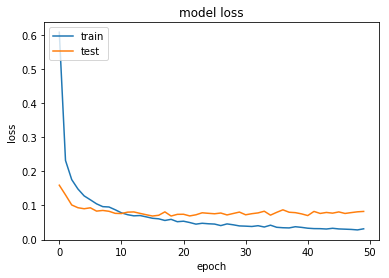

In [57]:
plot_loss(net_eff_m6_1)

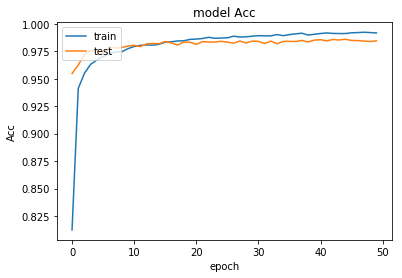

In [58]:
plot_accuracy(net_eff_m6_1)

In [59]:
net_eff6_2 = Sequential()
net_eff_m6_2 = network_effect5_1(net_eff6_2,128,100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_38 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_39 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_40 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 64)                8256      
__________

Epoch 79/100
 - 6s - loss: 0.0223 - acc: 0.9939 - val_loss: 0.0883 - val_acc: 0.9860
Epoch 80/100
 - 6s - loss: 0.0197 - acc: 0.9947 - val_loss: 0.0885 - val_acc: 0.9861
Epoch 81/100
 - 6s - loss: 0.0224 - acc: 0.9944 - val_loss: 0.1064 - val_acc: 0.9841
Epoch 82/100
 - 6s - loss: 0.0215 - acc: 0.9944 - val_loss: 0.0830 - val_acc: 0.9867
Epoch 83/100
 - 6s - loss: 0.0200 - acc: 0.9948 - val_loss: 0.0911 - val_acc: 0.9856
Epoch 84/100
 - 6s - loss: 0.0243 - acc: 0.9940 - val_loss: 0.0877 - val_acc: 0.9856
Epoch 85/100
 - 6s - loss: 0.0213 - acc: 0.9943 - val_loss: 0.0841 - val_acc: 0.9856
Epoch 86/100
 - 6s - loss: 0.0221 - acc: 0.9943 - val_loss: 0.0867 - val_acc: 0.9856
Epoch 87/100
 - 6s - loss: 0.0200 - acc: 0.9950 - val_loss: 0.0865 - val_acc: 0.9863
Epoch 88/100
 - 6s - loss: 0.0191 - acc: 0.9949 - val_loss: 0.0886 - val_acc: 0.9850
Epoch 89/100
 - 6s - loss: 0.0210 - acc: 0.9949 - val_loss: 0.0877 - val_acc: 0.9854
Epoch 90/100
 - 6s - loss: 0.0191 - acc: 0.9948 - val_loss: 0.094

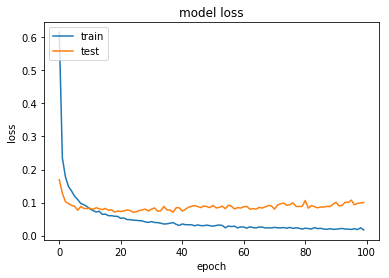

In [60]:
plot_loss(net_eff_m6_2)

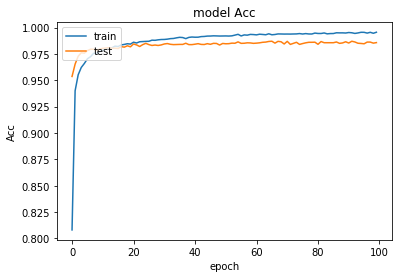

In [61]:
plot_accuracy(net_eff_m6_2)

In [20]:
def network_effect7(model,batch_size,epochs):
    num_classes = 10
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    
    adam = keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    
    model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
    return history

In [21]:
net_eff9 = Sequential()
net_eff_m9 = network_effect7(net_eff9,128,100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 7s - loss: 0.2491 - acc: 0.9241 - val_loss: 0.1317 - val_acc: 0.9614
Ep

Epoch 86/100
 - 8s - loss: 0.0880 - acc: 0.9866 - val_loss: 0.1889 - val_acc: 0.9788
Epoch 87/100
 - 8s - loss: 0.0932 - acc: 0.9863 - val_loss: 0.1964 - val_acc: 0.9788
Epoch 88/100
 - 8s - loss: 0.0994 - acc: 0.9861 - val_loss: 0.1749 - val_acc: 0.9811
Epoch 89/100
 - 8s - loss: 0.1061 - acc: 0.9863 - val_loss: 0.1859 - val_acc: 0.9804
Epoch 90/100
 - 8s - loss: 0.0970 - acc: 0.9868 - val_loss: 0.1950 - val_acc: 0.9793
Epoch 91/100
 - 8s - loss: 0.0825 - acc: 0.9880 - val_loss: 0.1600 - val_acc: 0.9776
Epoch 92/100
 - 8s - loss: 0.0883 - acc: 0.9877 - val_loss: 0.1839 - val_acc: 0.9802
Epoch 93/100
 - 8s - loss: 0.1174 - acc: 0.9850 - val_loss: 0.2006 - val_acc: 0.9787
Epoch 94/100
 - 8s - loss: 0.0887 - acc: 0.9869 - val_loss: 0.1883 - val_acc: 0.9781
Epoch 95/100
 - 7s - loss: 0.1177 - acc: 0.9850 - val_loss: 0.2139 - val_acc: 0.9782
Epoch 96/100
 - 8s - loss: 0.0935 - acc: 0.9869 - val_loss: 0.1607 - val_acc: 0.9819
Epoch 97/100
 - 8s - loss: 0.0958 - acc: 0.9875 - val_loss: 0.168

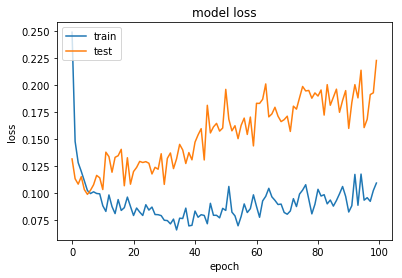

In [22]:
plot_loss(net_eff_m9)

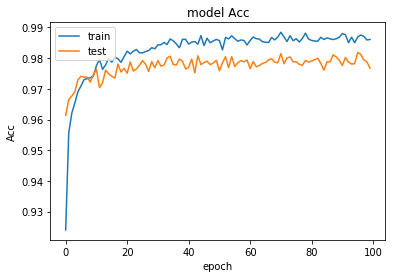

In [24]:
plot_accuracy(net_eff_m9)